<a href="https://colab.research.google.com/github/jiin-son/nba/blob/main/NBA_Machine_Learning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [3]:
!pip install xgboost
import xgboost as xgb

In [4]:
!pip install optuna
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 3.9 MB/s eta 0:00:00


In [5]:
from google.colab import files
uploaded = files.upload()

Saving prep_df1.csv to prep_df1.csv


In [6]:
df = pd.read_csv('prep_df1.csv')

In [7]:
import random
import hashlib

def md5_hash(input_string):
  """Generates an MD5 hash from a given string.
  Args:
    input_string: The string to hash.
  Returns:
    The MD5 hash as a hexadecimal string.
  """
  md5_hasher = hashlib.md5()
  md5_hasher.update(input_string.encode('utf-8'))
  return md5_hasher.hexdigest()

# Example usage
input_string = "NBA"
hashed_value = md5_hash(input_string)
print(f"The MD5 hash of '{input_string}' is: {hashed_value}")

# Convert the hexadecimal hash to an integer
try:
    number = int(hashed_value, 16)
    print(f"The integer representation of the hash is: {number}")
except ValueError:
    print("Invalid hexadecimal string")

# Set the seed value
random.seed(number)

print(f"Initial seed number: {number}")

# Generate a list of 10 random numbers
random.seed(number)
a = 0
b = 2**31-1
random_numbers = [random.randint(a, b) for _ in range(10)]

# Print the list
print("Seed", random_numbers)

The MD5 hash of 'NBA' is: 52b6d6fc82db6aef110362f4755a1fe8
The integer representation of the hash is: 109946054124266886270703940407869972456
Initial seed number: 109946054124266886270703940407869972456
Seed [1578879816, 1978497697, 1190903919, 1878057853, 1288653849, 873208946, 343223680, 1954458820, 1609495891, 882467736]


In [8]:
df

,HOME,OVERTIME,REST_DAYS,PREVIOUS_GAME_WIN_STREAK,FG_PCT,FT_PCT,REB,AST,STL,BLK,TO,PF,Height_in_Inches,YEARS_IN_LEAGUE,FG_PCT_LAST_SEASON,FT_PCT_LAST_SEASON,REB_LAST_SEASON,AST_LAST_SEASON,STL_LAST_SEASON,BLK_LAST_SEASON,TOV_LAST_SEASON,PF_LAST_SEASON,TRADED_LAST_SEASON,PLAYER_AGE,TRADED_THIS_SEASON,POS_G,POS_F,POS_C,POS_FC,POS_GF,POS_CF,POS_FG,TEAM_GSW,TEAM_OKC,TEAM_CHI,TEAM_MEM,TEAM_ORL,TEAM_SAS,TEAM_DAL,TEAM_TOR,TEAM_LAC,TEAM_PHI,TEAM_SAC,TEAM_BOS,TEAM_IND,TEAM_DET,TEAM_MIL,TEAM_CLE,TEAM_WAS,TEAM_CHA,TEAM_HOU,TEAM_DEN,TEAM_PHX,TEAM_MIA,TEAM_UTA,TEAM_LAL,TEAM_POR,TEAM_MIN,TEAM_NYK,TEAM_BKN,TEAM_ATL,TEAM_NOP,W
0,0.000,0.000,2.000,3.000,0.421,1.000,3.000,3.000,1.000,1.000,3.000,2.000,78,9.000,0.499,0.703,387.000,249.000,83.000,37.000,166.000,185.000,0.000,28.000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000
1,0.000,0.000,2.000,3.000,0.412,0.833,10.000,1.000,2.000,0.000,2.000,1.000,80,8.000,0.471,0.833,601.000,364.000,75.000,43.000,188.000,145.000,0.000,26.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000
2,0.000,0.000,2.000,3.000,0.500,1.000,9.000,1.000,1.000,0.000,4.000,5.000,86,10.000,0.516,0.858,409.000,115.000,42.000,111.000,89.000,156.000,0.000,29.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000
3,0.000,0.000,2.000,3.000,0.308,0.500,4.000,4.000,1.000,3.000,3.000,1.000,76,8.000,0.461,0.901,310.000,377.000,74.000,87.000,112.000,152.000,0.000,30.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000
4,0.000,0.000,2.000,3.000,0.167,0.000,8.000,6.000,0.000,0.000,2.000,4.000,76,16.000,0.480,0.833,373.000,333.000,61.000,53.000,124.000,108.000,0.000,34.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9542,1.000,0.000,0.000,7.000,0.100,0.000,4.000,4.000,0.000,0.000,1.000,2.000,73,5.000,0.468,0.821,265.000,281.000,39.000,6.000,61.000,106.000,0.000,26.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000
9543,1.000,0.000,0.000,7.000,0.400,0.000,5.000,1.000,0.000,0.000,0.000,2.000,79,4.000,0.446,0.895,276.000,82.000,40.000,25.000,32.000,99.000,0.000,27.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000
9544,1.000,0.000,0.000,7.000,0.167,0.000,7.000,2.000,0.000,0.000,0.000,1.000,79,5.000,0.434,0.440,211.000,77.000,51.000,44.000,34.000,75.000,1.000,25.000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000
9545,1.000,0.000,0.000,7.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,78,2.000,0.400,0.500,20.000,5.000,5.000,1.000,3.000,11.000,0.000,20.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000


In [9]:
seed1 = random_numbers[0]

In [10]:
sub_df = df.drop([
       'POS_G', 'POS_F', 'POS_C', 'POS_FC', 'POS_GF', 'POS_CF', 'POS_FG',
       'TEAM_GSW', 'TEAM_OKC', 'TEAM_CHI', 'TEAM_MEM',
       'TEAM_ORL', 'TEAM_SAS', 'TEAM_DAL', 'TEAM_TOR', 'TEAM_LAC', 'TEAM_PHI',
       'TEAM_SAC', 'TEAM_BOS', 'TEAM_IND', 'TEAM_DET', 'TEAM_MIL', 'TEAM_CLE',
       'TEAM_WAS', 'TEAM_CHA', 'TEAM_HOU', 'TEAM_DEN', 'TEAM_PHX', 'TEAM_MIA',
       'TEAM_UTA', 'TEAM_LAL', 'TEAM_POR', 'TEAM_MIN', 'TEAM_NYK', 'TEAM_BKN',
       'TEAM_ATL', 'TEAM_NOP'], axis = 1)
X = sub_df.drop(['W'], axis = 1)
y = sub_df['W']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed1)

In [52]:
# Define objective function
def objective(trial):
    # Suggest values for hyperparameters
    learning_rate = trial.suggest_float("learning_rate", 0.1, 0.9)
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 10)
    min_impurity_decrease= trial.suggest_float("min_impurity_decrease", 0.1, 0.9)


    # Create and fit random forest model
    model = GradientBoostingClassifier(
    learning_rate = learning_rate,
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    min_impurity_decrease = min_impurity_decrease,
    random_state=seed1,
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred = [1 if y > 0.5 else 0 for y in y_pred]
    accuracy = accuracy_score(y_test,y_pred)

    return accuracy

In [53]:
# Create study object
study = optuna.create_study(direction="maximize")

# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2025-02-12 02:08:16,131] A new study created in memory with name: no-name-a1927af4-3e1b-49bd-89e8-c07f789e07de


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-02-12 02:08:16,361] Trial 0 finished with value: 0.612565445026178 and parameters: {'learning_rate': 0.4340575852122617, 'n_estimators': 10, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 6, 'min_impurity_decrease': 0.6016078923419031}. Best is trial 0 with value: 0.612565445026178.
[I 2025-02-12 02:08:17,235] Trial 1 finished with value: 0.5984293193717277 and parameters: {'learning_rate': 0.5408198134651255, 'n_estimators': 36, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 3, 'min_impurity_decrease': 0.1496639551823618}. Best is trial 0 with value: 0.612565445026178.
[I 2025-02-12 02:08:17,852] Trial 2 finished with value: 0.643455497382199 and parameters: {'learning_rate': 0.20078290620594066, 'n_estimators': 12, 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 6, 'min_impurity_decrease': 0.7522556603094352}. Best is trial 2 with value: 0.643455497382199.
[I 2025-02-12 02:08:18,291] Trial 3 finished with value: 0.6287958115183246 and pa

In [54]:
# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)

Best trial: FrozenTrial(number=14, state=1, values=[0.6492146596858639], datetime_start=datetime.datetime(2025, 2, 12, 2, 8, 28, 697916), datetime_complete=datetime.datetime(2025, 2, 12, 2, 8, 30, 306299), params={'learning_rate': 0.1974253712260582, 'n_estimators': 97, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.7684266711361902}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.9, log=False, low=0.1, step=None), 'n_estimators': IntDistribution(high=200, log=True, low=10, step=1), 'max_depth': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=2, step=1), 'min_impurity_decrease': FloatDistribution(high=0.9, log=False, low=0.1, step=None)}, trial_id=14, value=None)
Best hyperparameters: {'learning_rate': 0.1974253712260582, 'n_estimators': 97, 'm

In [55]:
# prompt: use the best hyperparameters and run the model

# Get the best hyperparameters from the study
best_params = study.best_params

# Create and train the model with the best hyperparameters
best_model = GradientBoostingClassifier(**best_params, random_state=seed1)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # see if this makes sense for the NBA game
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro'):.3f}") # positive case - f1 score (yes) and negative case
print(f"F1 Score - Negative: {f1_score(y_test, y_pred, pos_label = 0):.3f}")
print(f"Specificity: {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity: {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.649
F1 Score: 0.649
F1 Score - Negative: 0.655
Specificity: 0.645
Sensitivity: 0.641
ROC AUC: 0.649
[[636 332]
 [338 604]]


In [19]:
!pip install shap
import shap

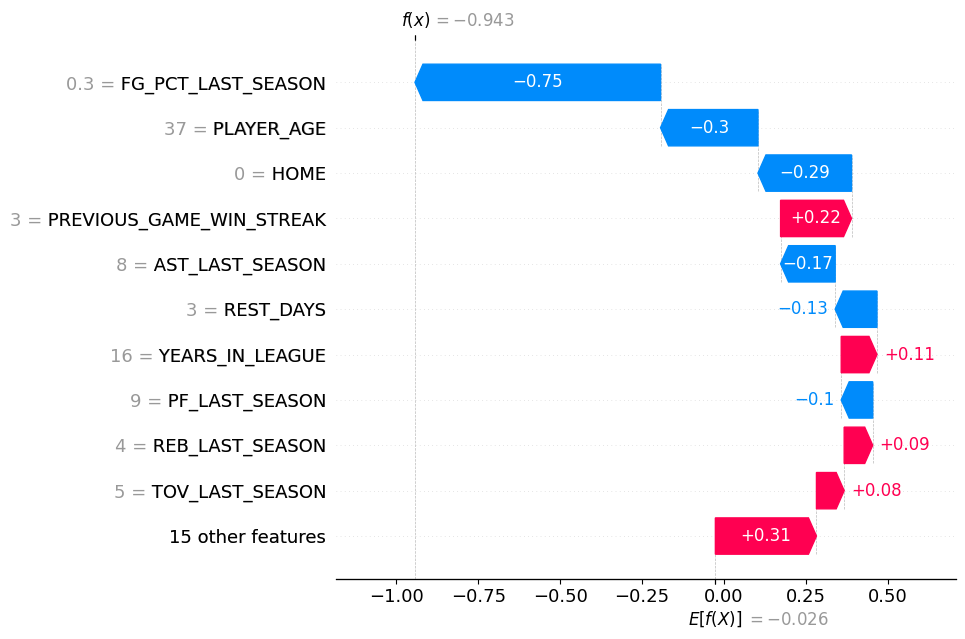

In [21]:
# (4) Train 3 seeds and pick up 1 representative seed result to explain feature to target relationships using shap.
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test, check_additivity = False)
# which of the variables are important to the target = bare_nuclei
shap.plots.waterfall(shap_values[0], max_display = 11)

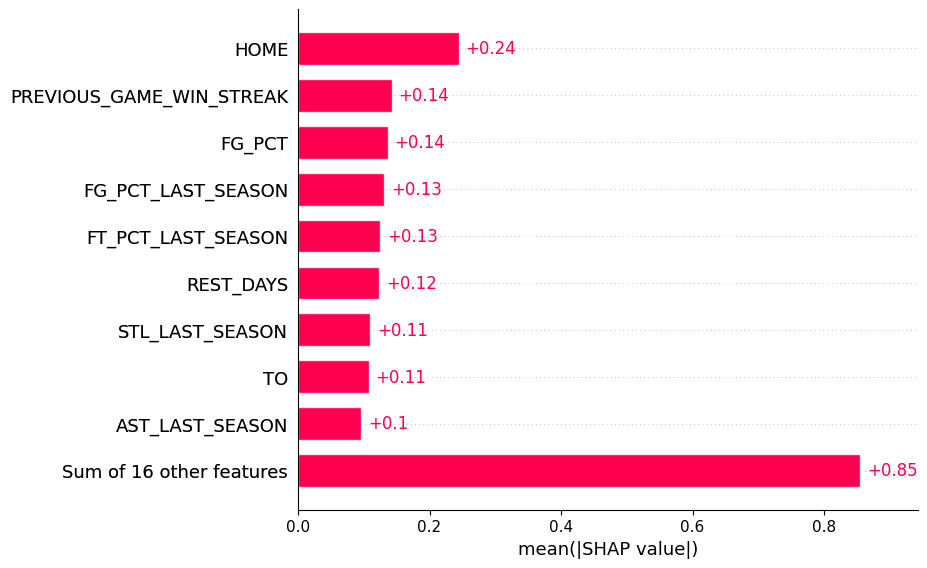

In [22]:
shap.plots.bar(shap_values)

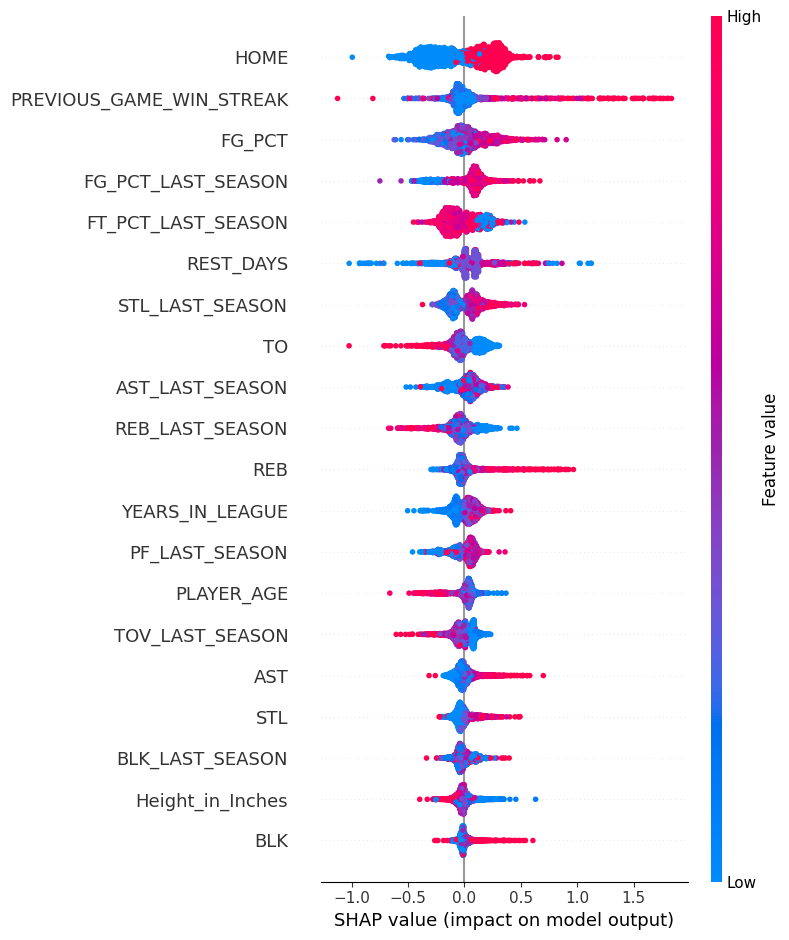

In [23]:
shap.summary_plot(shap_values)

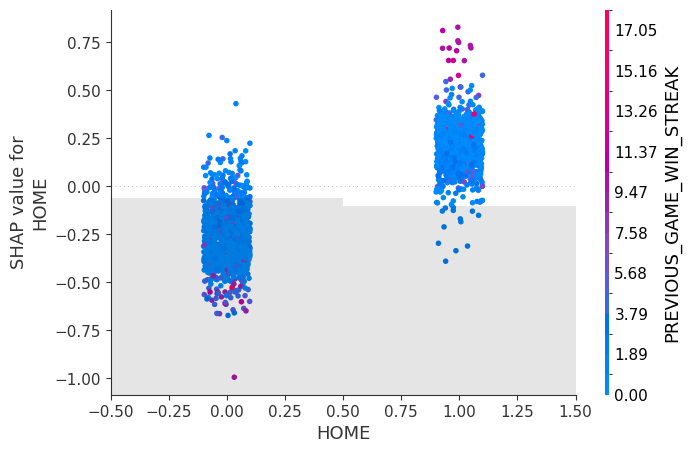

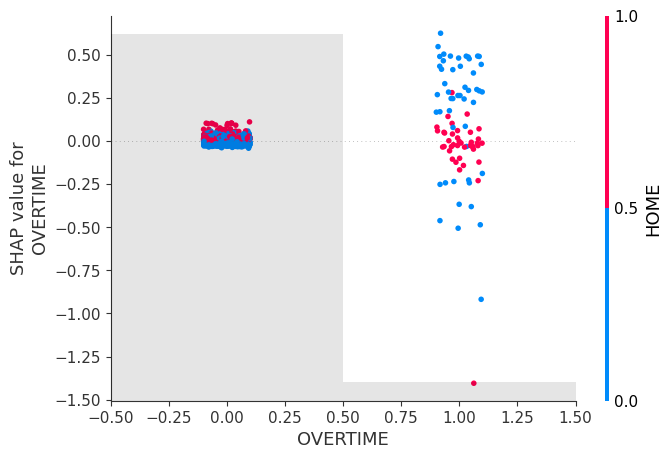

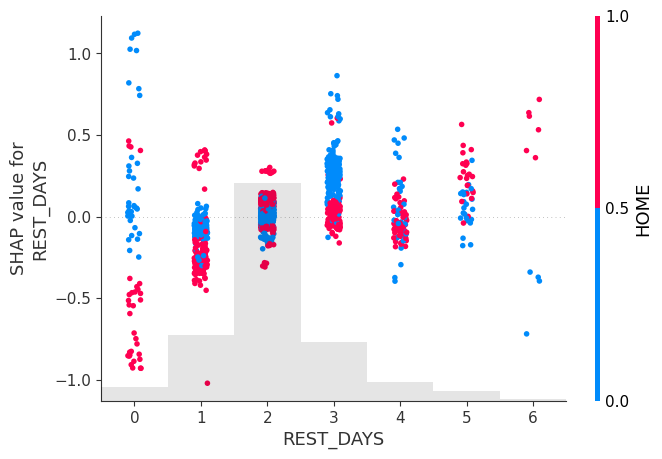

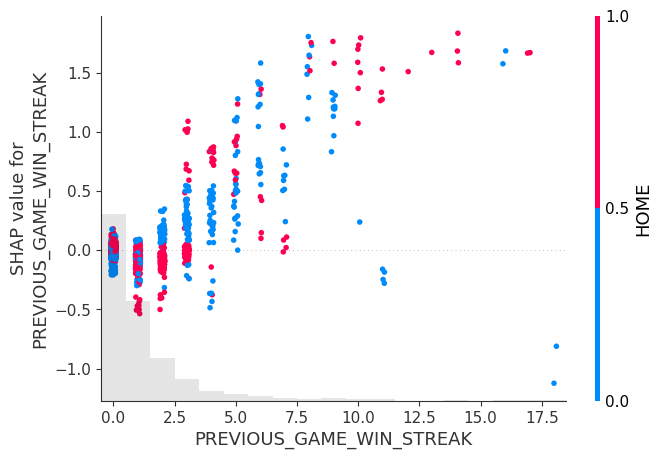

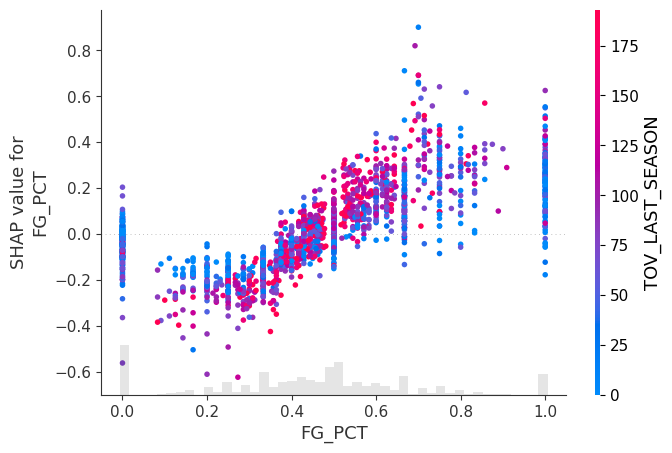

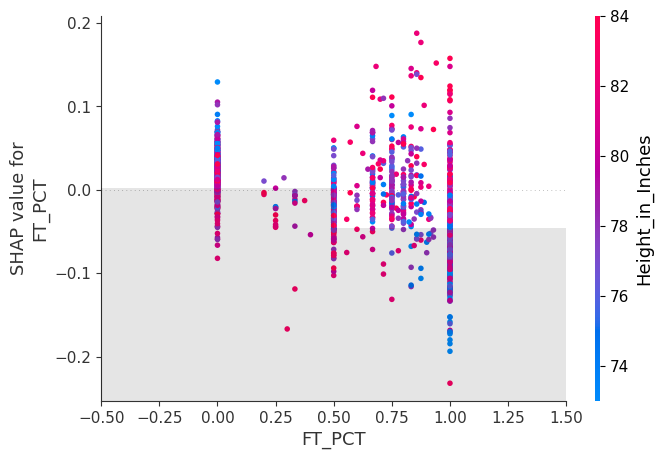

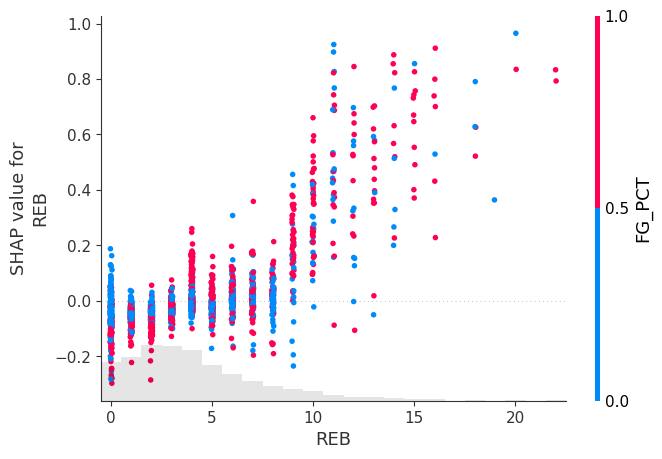

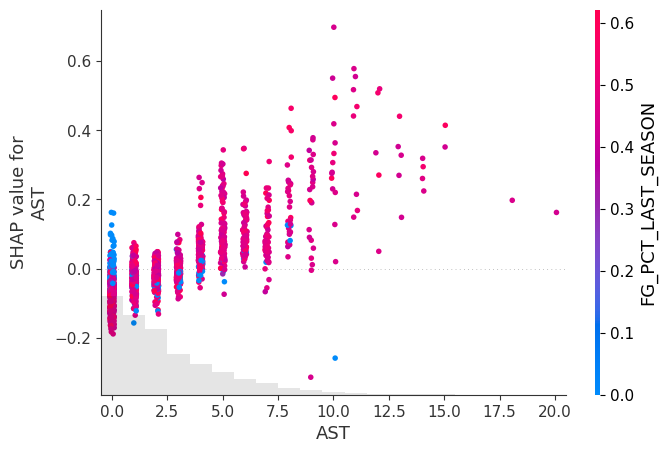

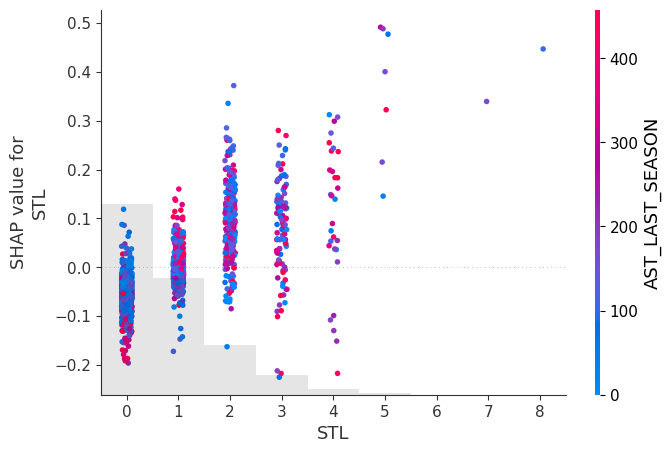

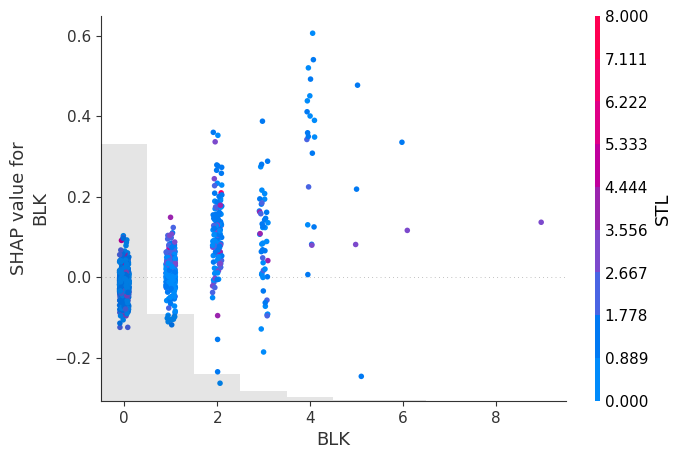

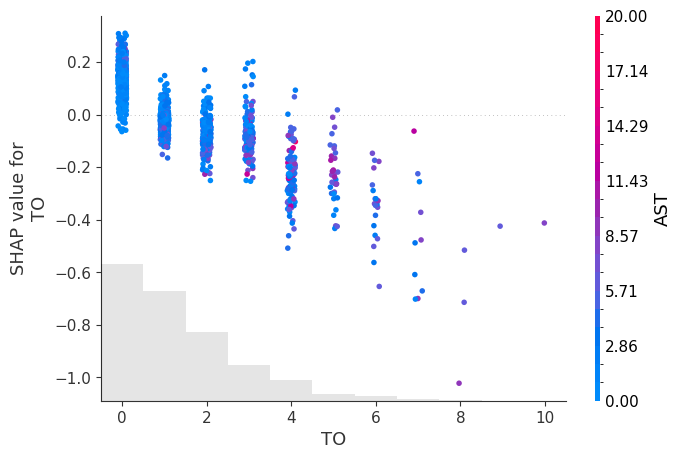

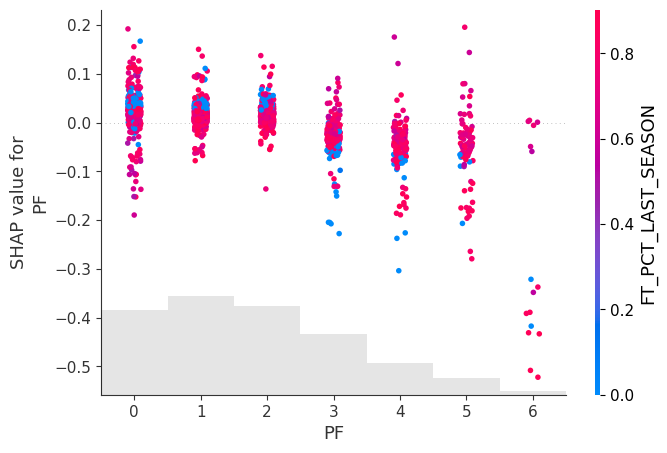

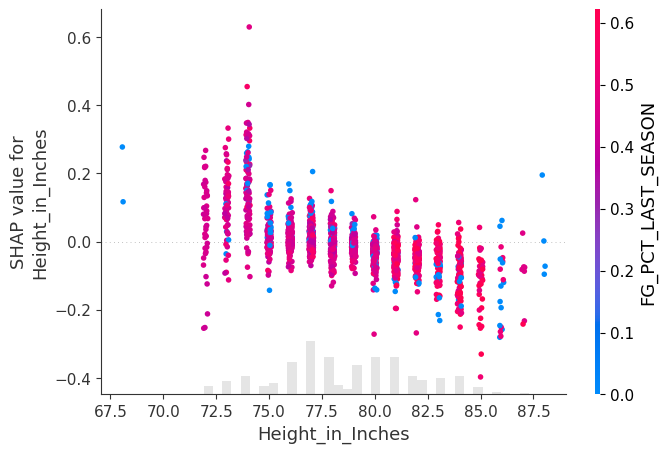

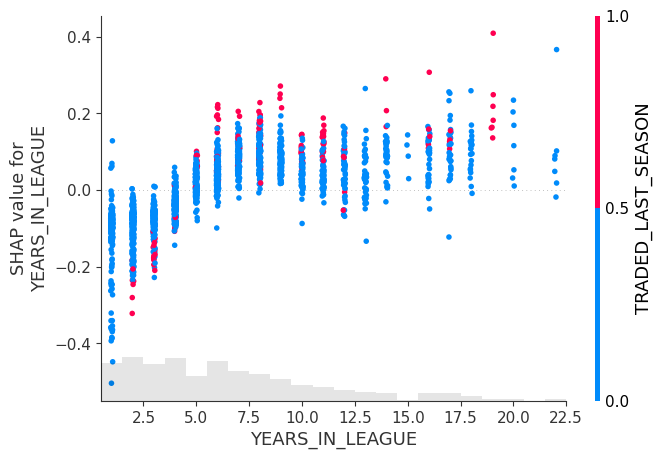

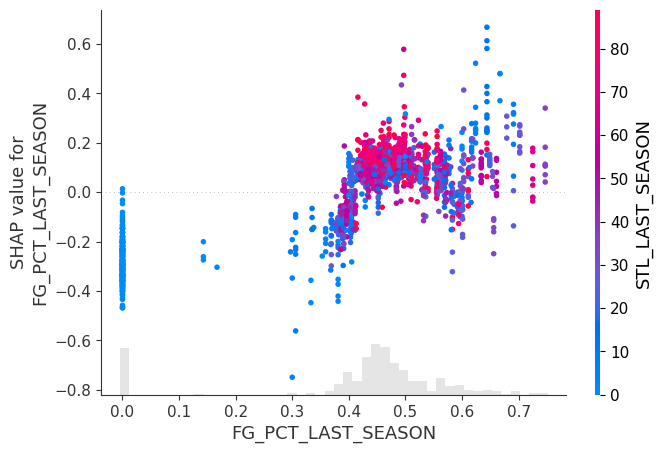

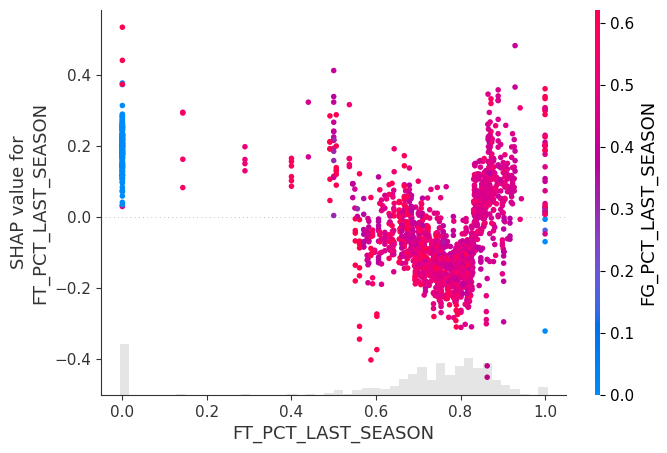

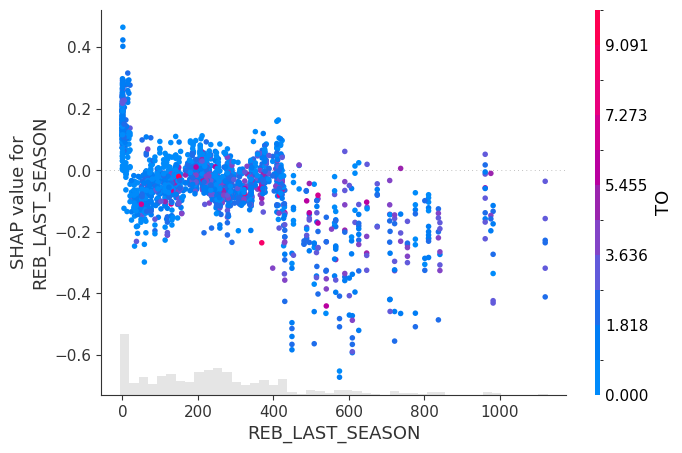

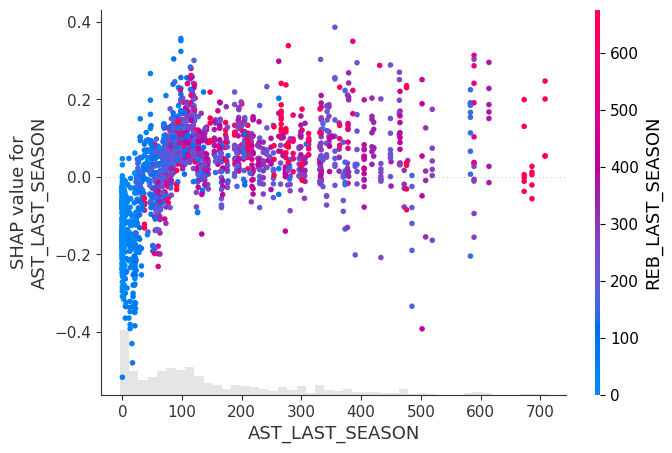

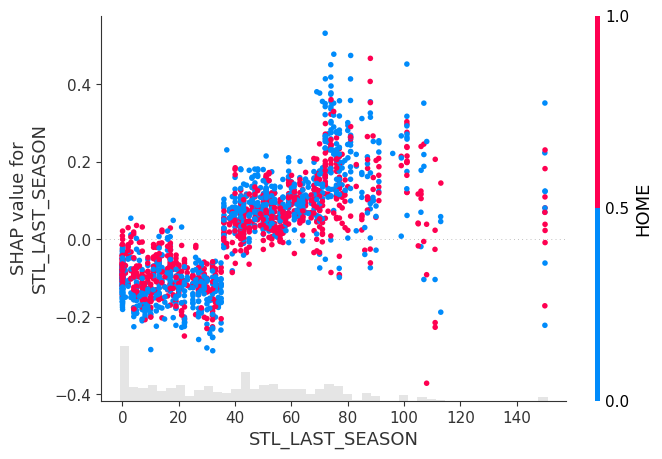

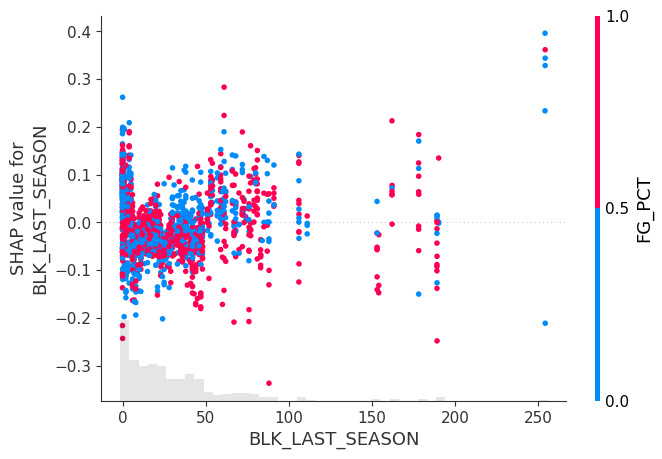

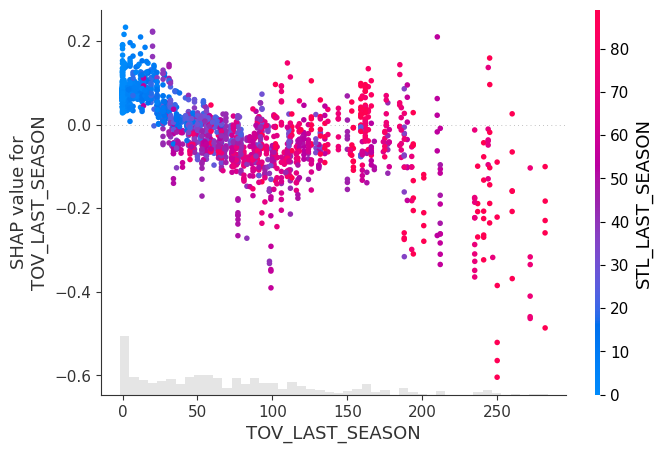

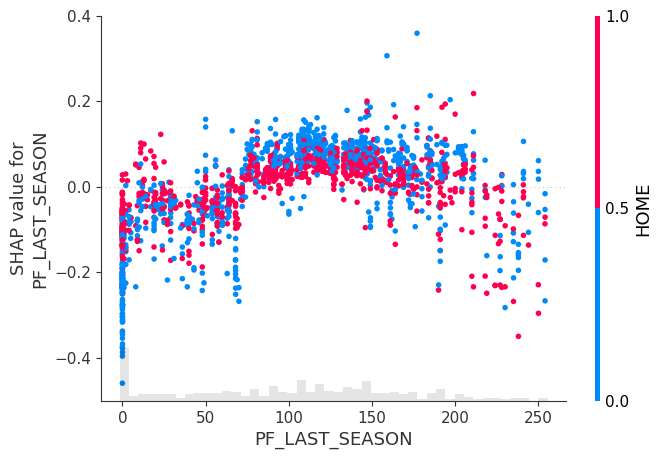

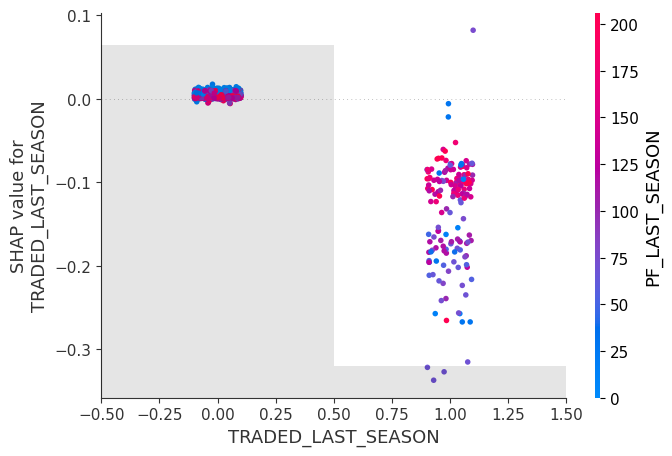

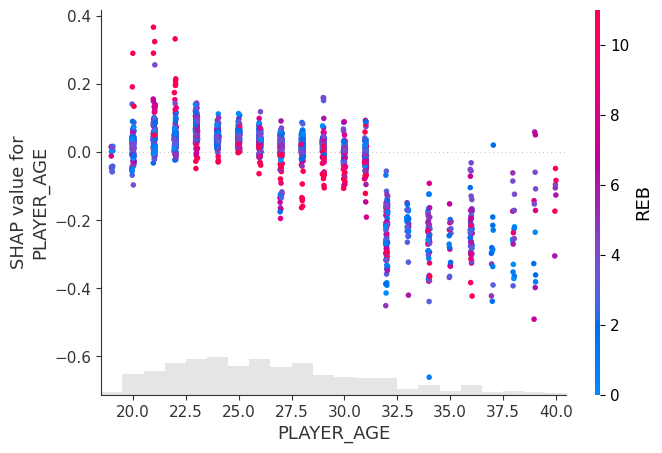

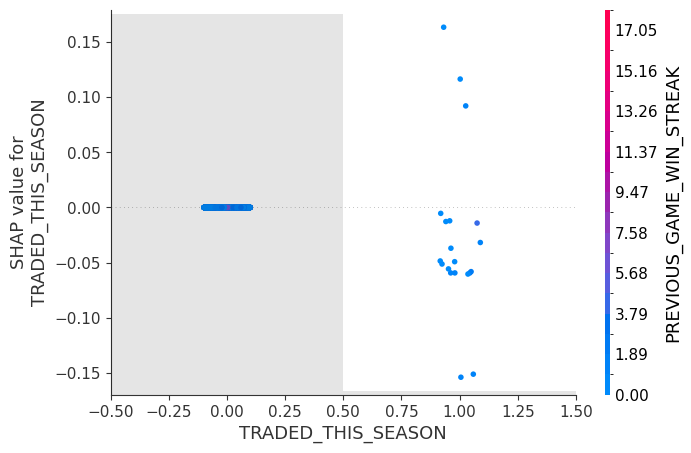

In [25]:
for name in X_train.columns:
    shap.plots.scatter(shap_values[:, name], color=shap_values)

# all star breaks - 6 days - might be interesting what was the rest day for the opponent
# star players gets more ball and therefore, the turnover
# turnover percentage is correlated to how much you have the ball
# step curry most likely miss 3s because the team lets him to shoot 3s

Seed #2

In [56]:
seed2 = random_numbers[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed2)

In [57]:
# Define objective function
def objective(trial):
    # Suggest values for hyperparameters
    learning_rate = trial.suggest_float("learning_rate", 0.1, 0.9)
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 10)
    min_impurity_decrease= trial.suggest_float("min_impurity_decrease", 0.1, 0.9)


    # Create and fit random forest model
    model = GradientBoostingClassifier(
    learning_rate = learning_rate,
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    min_impurity_decrease = min_impurity_decrease,
    random_state=seed2,
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred = [1 if y > 0.5 else 0 for y in y_pred]
    accuracy = accuracy_score(y_test,y_pred)

    return accuracy

In [58]:
# Create study object
study = optuna.create_study(direction="maximize")
# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2025-02-12 02:09:17,814] A new study created in memory with name: no-name-6f0ac95f-2b0f-4dd3-a2b8-9078d62881bd


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-02-12 02:09:18,909] Trial 0 finished with value: 0.6089005235602094 and parameters: {'learning_rate': 0.48375129694308727, 'n_estimators': 91, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.3902059798206915}. Best is trial 0 with value: 0.6089005235602094.
[I 2025-02-12 02:09:19,675] Trial 1 finished with value: 0.6073298429319371 and parameters: {'learning_rate': 0.853641555769731, 'n_estimators': 58, 'max_depth': 2, 'min_samples_split': 7, 'min_samples_leaf': 7, 'min_impurity_decrease': 0.1187794637332405}. Best is trial 0 with value: 0.6089005235602094.
[I 2025-02-12 02:09:20,524] Trial 2 finished with value: 0.6073298429319371 and parameters: {'learning_rate': 0.6394671439602577, 'n_estimators': 27, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 3, 'min_impurity_decrease': 0.13998613992487074}. Best is trial 0 with value: 0.6089005235602094.
[I 2025-02-12 02:09:22,353] Trial 3 finished with value: 0.6130890052356021 an

In [59]:
# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)

Best trial: FrozenTrial(number=6, state=1, values=[0.6356020942408377], datetime_start=datetime.datetime(2025, 2, 12, 2, 9, 25, 631954), datetime_complete=datetime.datetime(2025, 2, 12, 2, 9, 28, 454889), params={'learning_rate': 0.14978472691736666, 'n_estimators': 134, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 6, 'min_impurity_decrease': 0.15629723175016805}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.9, log=False, low=0.1, step=None), 'n_estimators': IntDistribution(high=200, log=True, low=10, step=1), 'max_depth': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=2, step=1), 'min_impurity_decrease': FloatDistribution(high=0.9, log=False, low=0.1, step=None)}, trial_id=6, value=None)
Best hyperparameters: {'learning_rate': 0.14978472691736666, 'n_estimators': 134,

In [60]:
# prompt: use the best hyperparameters and run the model

# Get the best hyperparameters from the study
best_params = study.best_params

# Create and train the model with the best hyperparameters
best_model = GradientBoostingClassifier(**best_params, random_state=seed2)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # see if this makes sense for the NBA game
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro'):.3f}") # positive case - f1 score (yes) and negative case
print(f"F1 Score - Negative: {f1_score(y_test, y_pred, pos_label = 0):.3f}")
print(f"Specificity: {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity: {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.636
F1 Score: 0.636
F1 Score - Negative: 0.637
Specificity: 0.622
Sensitivity: 0.647
ROC AUC: 0.636
[[610 367]
 [329 604]]


In [61]:
explainer = shap.Explainer(best_model, X_train)
shap_values2 = explainer(X_test, check_additivity = False)

In [62]:
seed3 = random_numbers[3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed3)

In [63]:
# Define objective function
def objective(trial):
    # Suggest values for hyperparameters
    learning_rate = trial.suggest_float("learning_rate", 0.1, 0.9)
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 10)
    min_impurity_decrease= trial.suggest_float("min_impurity_decrease", 0.1, 0.9)


    # Create and fit random forest model
    model = GradientBoostingClassifier(
    learning_rate = learning_rate,
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    min_impurity_decrease = min_impurity_decrease,
    random_state=seed3,
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred = [1 if y > 0.5 else 0 for y in y_pred]
    accuracy = accuracy_score(y_test,y_pred)

    return accuracy

In [64]:
# Create study object
study = optuna.create_study(direction="maximize")
# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2025-02-12 02:10:20,837] A new study created in memory with name: no-name-e6e9bff6-4a85-48b3-9d6e-859082815930


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-02-12 02:10:21,593] Trial 0 finished with value: 0.5863874345549738 and parameters: {'learning_rate': 0.7660655108570945, 'n_estimators': 39, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.28282638202592136}. Best is trial 0 with value: 0.5863874345549738.
[I 2025-02-12 02:10:22,238] Trial 1 finished with value: 0.6010471204188481 and parameters: {'learning_rate': 0.8067033484756737, 'n_estimators': 49, 'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.7678625434384471}. Best is trial 1 with value: 0.6010471204188481.
[I 2025-02-12 02:10:23,386] Trial 2 finished with value: 0.6408376963350786 and parameters: {'learning_rate': 0.25032032560409456, 'n_estimators': 51, 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 10, 'min_impurity_decrease': 0.827904075323462}. Best is trial 2 with value: 0.6408376963350786.
[I 2025-02-12 02:10:24,828] Trial 3 finished with value: 0.6272251308900524 

In [65]:
# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)

Best trial: FrozenTrial(number=2, state=1, values=[0.6408376963350786], datetime_start=datetime.datetime(2025, 2, 12, 2, 10, 22, 245079), datetime_complete=datetime.datetime(2025, 2, 12, 2, 10, 23, 385613), params={'learning_rate': 0.25032032560409456, 'n_estimators': 51, 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 10, 'min_impurity_decrease': 0.827904075323462}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.9, log=False, low=0.1, step=None), 'n_estimators': IntDistribution(high=200, log=True, low=10, step=1), 'max_depth': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=2, step=1), 'min_impurity_decrease': FloatDistribution(high=0.9, log=False, low=0.1, step=None)}, trial_id=2, value=None)
Best hyperparameters: {'learning_rate': 0.25032032560409456, 'n_estimators': 51, 

In [66]:
# prompt: use the best hyperparameters and run the model

# Get the best hyperparameters from the study
best_params = study.best_params

# Create and train the model with the best hyperparameters
best_model = GradientBoostingClassifier(**best_params, random_state=seed3)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # see if this makes sense for the NBA game
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro'):.3f}") # positive case - f1 score (yes) and negative case
print(f"F1 Score - Negative: {f1_score(y_test, y_pred, pos_label = 0):.3f}")
print(f"Specificity: {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity: {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.641
F1 Score: 0.641
F1 Score - Negative: 0.637
Specificity: 0.661
Sensitivity: 0.628
ROC AUC: 0.641
[[603 318]
 [368 621]]


In [67]:
explainer = shap.Explainer(best_model, X_train)
shap_values3 = explainer(X_test, check_additivity = False)

In [68]:
seed4 = random_numbers[4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed4)

In [69]:
# Define objective function
def objective(trial):
    # Suggest values for hyperparameters
    learning_rate = trial.suggest_float("learning_rate", 0.1, 0.9)
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 10)
    min_impurity_decrease= trial.suggest_float("min_impurity_decrease", 0.1, 0.9)


    # Create and fit random forest model
    model = GradientBoostingClassifier(
    learning_rate = learning_rate,
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    min_impurity_decrease = min_impurity_decrease,
    random_state=seed4,
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred = [1 if y > 0.5 else 0 for y in y_pred]
    accuracy = accuracy_score(y_test,y_pred)

    return accuracy

In [70]:
# Create study object
study = optuna.create_study(direction="maximize")
# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2025-02-12 02:10:55,553] A new study created in memory with name: no-name-4ced34b3-7978-4df9-b26a-c45c1a57e985


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-02-12 02:10:56,769] Trial 0 finished with value: 0.6094240837696335 and parameters: {'learning_rate': 0.5327890679662628, 'n_estimators': 117, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 3, 'min_impurity_decrease': 0.5757039171409639}. Best is trial 0 with value: 0.6094240837696335.
[I 2025-02-12 02:10:57,658] Trial 1 finished with value: 0.6345549738219896 and parameters: {'learning_rate': 0.18459543658764732, 'n_estimators': 16, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.12467446548211694}. Best is trial 1 with value: 0.6345549738219896.
[I 2025-02-12 02:10:59,015] Trial 2 finished with value: 0.6356020942408377 and parameters: {'learning_rate': 0.12461605260997999, 'n_estimators': 36, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 7, 'min_impurity_decrease': 0.15324763291801427}. Best is trial 2 with value: 0.6356020942408377.
[I 2025-02-12 02:11:01,031] Trial 3 finished with value: 0.63141361256544

In [71]:
# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)

Best trial: FrozenTrial(number=14, state=1, values=[0.6376963350785341], datetime_start=datetime.datetime(2025, 2, 12, 2, 11, 10, 777447), datetime_complete=datetime.datetime(2025, 2, 12, 2, 11, 11, 893535), params={'learning_rate': 0.2265559028133463, 'n_estimators': 35, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.25266210949481505}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.9, log=False, low=0.1, step=None), 'n_estimators': IntDistribution(high=200, log=True, low=10, step=1), 'max_depth': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=2, step=1), 'min_impurity_decrease': FloatDistribution(high=0.9, log=False, low=0.1, step=None)}, trial_id=14, value=None)
Best hyperparameters: {'learning_rate': 0.2265559028133463, 'n_estimators': 35,

In [72]:
# prompt: use the best hyperparameters and run the model

# Get the best hyperparameters from the study
best_params = study.best_params

# Create and train the model with the best hyperparameters
best_model = GradientBoostingClassifier(**best_params, random_state=seed4)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # see if this makes sense for the NBA game
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro'):.3f}") # positive case - f1 score (yes) and negative case
print(f"F1 Score - Negative: {f1_score(y_test, y_pred, pos_label = 0):.3f}")
print(f"Specificity: {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity: {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.638
F1 Score: 0.638
F1 Score - Negative: 0.638
Specificity: 0.670
Sensitivity: 0.608
ROC AUC: 0.639
[[609 300]
 [392 609]]


In [73]:
explainer = shap.Explainer(best_model, X_train)
shap_values4 = explainer(X_test, check_additivity = False)

In [74]:
seed5 = random_numbers[5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed5)

In [75]:
# Define objective function
def objective(trial):
    # Suggest values for hyperparameters
    learning_rate = trial.suggest_float("learning_rate", 0.1, 0.9)
    n_estimators = trial.suggest_int("n_estimators", 10, 200, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 10)
    min_impurity_decrease= trial.suggest_float("min_impurity_decrease", 0.1, 0.9)


    # Create and fit random forest model
    model = GradientBoostingClassifier(
    learning_rate = learning_rate,
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    min_impurity_decrease = min_impurity_decrease,
    random_state=seed5,
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred = [1 if y > 0.5 else 0 for y in y_pred]
    accuracy = accuracy_score(y_test,y_pred)

    return accuracy

In [76]:
# Create study object
study = optuna.create_study(direction="maximize")
# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

[I 2025-02-12 02:11:30,846] A new study created in memory with name: no-name-ee8fbb41-db32-41cd-aaa8-56bc8084bd38


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-02-12 02:11:31,252] Trial 0 finished with value: 0.6036649214659686 and parameters: {'learning_rate': 0.8814728598405929, 'n_estimators': 15, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 6, 'min_impurity_decrease': 0.2587435122806724}. Best is trial 0 with value: 0.6036649214659686.
[I 2025-02-12 02:11:32,053] Trial 1 finished with value: 0.6335078534031413 and parameters: {'learning_rate': 0.8142546956248173, 'n_estimators': 72, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.530552031852573}. Best is trial 1 with value: 0.6335078534031413.
[I 2025-02-12 02:11:32,668] Trial 2 finished with value: 0.6282722513089005 and parameters: {'learning_rate': 0.46238987902892903, 'n_estimators': 53, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 3, 'min_impurity_decrease': 0.6412306232393268}. Best is trial 1 with value: 0.6335078534031413.
[I 2025-02-12 02:11:33,029] Trial 3 finished with value: 0.6068062827225131 and

In [77]:
# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)

Best trial: FrozenTrial(number=19, state=1, values=[0.6575916230366492], datetime_start=datetime.datetime(2025, 2, 12, 2, 11, 48, 926794), datetime_complete=datetime.datetime(2025, 2, 12, 2, 11, 50, 39133), params={'learning_rate': 0.1037191629675272, 'n_estimators': 34, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 7, 'min_impurity_decrease': 0.13022007061985075}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.9, log=False, low=0.1, step=None), 'n_estimators': IntDistribution(high=200, log=True, low=10, step=1), 'max_depth': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=10, log=False, low=2, step=1), 'min_impurity_decrease': FloatDistribution(high=0.9, log=False, low=0.1, step=None)}, trial_id=19, value=None)
Best hyperparameters: {'learning_rate': 0.1037191629675272, 'n_estimators': 34, 

In [78]:
# prompt: use the best hyperparameters and run the model

# Get the best hyperparameters from the study
best_params = study.best_params

# Create and train the model with the best hyperparameters
best_model = GradientBoostingClassifier(**best_params, random_state=seed5)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred = [1 if y > 0.5 else 0 for y in y_pred]

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # see if this makes sense for the NBA game
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro'):.3f}") # positive case - f1 score (yes) and negative case
print(f"F1 Score - Negative: {f1_score(y_test, y_pred, pos_label = 0):.3f}")
print(f"Specificity: {precision_score(y_test, y_pred):.3f}")
print(f"Sensitivity: {recall_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.3f}")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.658
F1 Score: 0.658
F1 Score - Negative: 0.657
Specificity: 0.648
Sensitivity: 0.670
ROC AUC: 0.658
[[625 343]
 [311 631]]


In [79]:
explainer = shap.Explainer(best_model, X_train)
shap_values5 = explainer(X_test, check_additivity = False)